# Assignment 4.

## Student Name/ID: Yuta Uchida / m5261176


---

## Create RNN using PyTorch `nn` Module

The aim of this assignment is to create an RNN with same structure as in the Problem 1 of Exercise 4, but using the PyTorch `nn` module.

---

As always, first, we import the necessary python libraries and do little housekeeping.

In [12]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt

# Set the random seed to 0
np.random.seed(0)
torch.manual_seed(0)

# Get PyTorch float type
dtype = torch.float

Data generation is the same ...

In [13]:
def DataGen(seq_length):

    # seq_length - Length of the sine wave (in points)

    # Generate time sequence
    data_time_steps = np.linspace(2, 10, seq_length + 1)

    # Generate sine wave
    data = np.sin(data_time_steps)

    # Reshape as one column vector
    data.resize((seq_length + 1, 1))

    # Make input tensor
    x = torch.tensor(data[:-1], dtype=dtype, requires_grad=False)

    # Make target tensor (shifted input by one sample)
    y = torch.tensor(data[1:], dtype=dtype, requires_grad=False)

    return x, y, data_time_steps

### Problem 1 ###

Create the same RNN as in Part 1 of the Exercise 4. This time use `nn.Linear` to make the network layers. The structure should be like this:

- Layer 1: (i2h) input-to-hidden
  - linear
  - input size = data size + (previous) hidden size, 
  - output size = hidden size
  - activation = tanh
- Layer 2: (h2o) hidden-to-output 
  - linear
  - input size = hidden size
  - output size = RNN output size
  - no activation

In [87]:
class RNN(nn.Module):
    def __init__(self, data_size, hidden_size, output_size):
        super(RNN, self).__init__()

        # Set the first layer size and remeber hidden layer size
        # !! Your code here !!
        input_size = data_size + hidden_size
        self.hidden_size = hidden_size

        # Create i2h and h2o layers
        # !!Your code here !!
        self.i2h = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.h2o = nn.Linear(hidden_size, output_size)
        

    def forward(self, input, hidden):
        # Make the forward computation
        # !!Your code here !!
        # Combine the input data and the output from the previous hidden layer
        combined = torch.cat((input, hidden), 1)
        # Calculate current hidden output
        hidden = self.i2h(combined)
        hidden = self.tanh(hidden)
        # Calculate current output
        output = self.h2o(hidden)

        return output, hidden

    def initHidden(self):
        # Initialize hidden layer
        return torch.zeros(1, self.hidden_size)

    def UpdateParams(self, learning_rate):
        # Update RNN parameters
        # !!Your code here !!
        # Update models parameters - W1 and W2 using learning rate 'lr'
        with torch.no_grad():
            self.i2h.weight.data -= learning_rate * self.i2h.weight.grad
            self.h2o.weight.data -= learning_rate * self.h2o.weight.grad

Now, choose appropriate loss fuinction.

In [88]:
# !!Your code here !!
loss_fn = nn.MSELoss()

Define the training procedure:

In [91]:
def train(model, x, y, epochs, lr):

    timesteps = x.size(0)

    for i in range(epochs):

        # Initialize total loss
        # !!Your code here !!
        loss = 0

        # Zero the gradients
        # !!Your code here !!
        model.zero_grad()
        
        # the hidden state vector
        # !!Your code here !!
        previous_hidden = model.initHidden()
        
        for j in range(timesteps):

            # Get input and target for the current timestep
            input = x[j:(j+1)]
            target = y[j:(j+1)]

            # Forward operation
            pred, previous_hidden = model.forward(input, previous_hidden)

            # Summ losses for each timestep
            loss += loss_fn(pred, target)

        if i % 50 == 0:
            print("Epoch: {} loss {}".format(i, loss.data.numpy()))

        # Calculate gradients
        # !!Your code here !!
        loss.backward()

        # Update parameters
        # !!Your code here !!
        model.UpdateParams(lr)

Set the training parameters and train the RNN.

In [92]:
input_size, hidden_size, output_size = 1, 6, 1
epochs = 300
seq_length = 20
lr = 0.005

x, y, time_steps = DataGen(seq_length)

rnn = RNN(input_size, hidden_size, output_size)

train(rnn, x, y, epochs, lr)

Epoch: 0 loss 12.032583236694336
Epoch: 50 loss 1.100253701210022
Epoch: 100 loss 0.3351498246192932
Epoch: 150 loss 0.22207482159137726
Epoch: 200 loss 0.15115749835968018
Epoch: 250 loss 0.10559065639972687


### Problem 2 ###

Make predictions with the trained RNN and then generate a sine wave.

In [94]:
def predict(model, x):

    predictions = []
    previous_hidden = model.initHidden()

    timesteps = x.size(0)

    for i in range(timesteps):

        # Make the predictioon loop
        # !!Your code here !!
        # Get current input value
        input = x[i:(i+1)]

        # Make Prediction
        pred, previous_hidden = model.forward(input, previous_hidden)

        # Save predictions
        predictions.append(pred.data.numpy().ravel()[0])

    return predictions

pred = predict (rnn, x)

Plot the result.

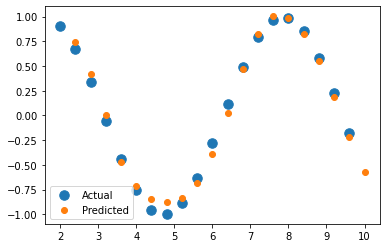

In [95]:
plt.scatter(time_steps[:-1], x.data.numpy(), s=90, label="Actual")
plt.scatter(time_steps[1:], pred, label="Predicted")
plt.legend()
plt.show()

Make function to generate sine wave.

In [96]:
def Generate(model, input, timesteps=20):

    # Initialize list of generated values
    generated = []

    # Initialize the hidden state vector
    previous_hidden = model.initHidden()

    # Set the first input point
    pred = input

    # Loop over the desired sequence length
    for i in range(timesteps):

        # Make generation loop
        # !!Your code here !!
        # Predict value and use it as the next input point
        pred, previous_hidden = model.forward(pred, previous_hidden)

        # Save generated points
        generated.append(pred.data.numpy().ravel()[0])

    return generated


inp = torch.rand((1, 1), dtype=dtype, requires_grad=False)
gen = Generate(rnn, inp)

Plot the result.

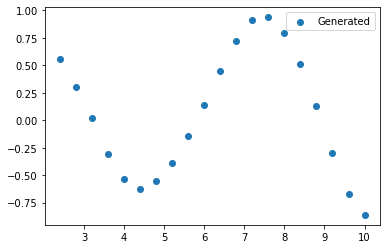

In [97]:
# Plot generated points
plt.scatter(time_steps[1:], gen, label="Generated")
plt.legend()
plt.show()

---